# Final Project CS418

_This file contains the jupyter notebook entailing the application of the data scicence project._
_Link to the ppt for the project:<https://docs.google.com/presentation/d/1ZkmopeDAhzznFytpMSVt_lVI8DvZVrbsTyGKRQ1yg-c/edit#slide=id.g2bc228a8286_0_0>_
_Link to github: https://github.com/uic-cs418/Mamba-Mentality_

***Project Introduction:***

    We will be analyzing correlations between two datasets, namely COVID vaccinations that surround the crux of the epidemic as well as the frequency of other viruses that occured during this time frame. Information will be extrapolated from 2020 to 2023 in the United States.

    Information will be analyzed by end of week increments citing this consistency in both data sets for more granularity in observations. Coarser data will be extracted on an annual level.

    For those afflicated with COVID, we will make observations in regards how ethnic denominations may be affected by the epidemic as well as population density. Are certain groups more susceptible? How about age?

    Is there correlations between vaccination rates and pathogen spread, and beyond Covid-19, has there been any effect on those afflicted by other respiratoy illnesses?

    Additionally, how effective has bivalent vaccinations performed in diseased populations? This can be observed concurrently with COVID and disjointly.

***Any changes:***

    The temporal observations have remained consistent, noting the seasonal distributions and changes in bivalent vaccinations and other vacinations. Furthermore, investigations on ethnic demographics will be a significant part of data analysis in regards to observing those afflicted with disease.

    Our comparative analysis will provide more data on how vaccinations that occur in parallel with the existence of other diseases changes over a bounded timeset. The specific demographic analysis will be more centralized on its relation to COVID vaccinations which remains consistent with the intial intended procedure.

## Importing libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from IPython.display import display, Latex, Markdown
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Importing Data


In [3]:
df = pd.read_csv("../data/Influenza__COVID-19__RSV__and_Other_Respiratory_Virus_Laboratory_Surveillance.csv", na_filter=False)
df.head()

,mmwr_week,week,week_start,week_end,season,pathogen,lab_tot_tested,lab_tot_positive,lab_pct_positive,lab_tot_tested_cumulative,lab_tot_positive_cumulative,lab_pct_positive_cumulative,current_week_ending,row_id
0,201040,40,10/03/2010,10/09/2010,2010-2011,Influenza,129,0,0,129,0,0.00,10/07/2023,201040-Influenza
1,201041,41,10/10/2010,10/16/2010,2010-2011,Influenza,133,0,0,262,0,0.00,10/14/2023,201041-Influenza
2,201042,42,10/17/2010,10/23/2010,2010-2011,Influenza,144,0,0,406,0,0.00,10/21/2023,201042-Influenza
3,201043,43,10/24/2010,10/30/2010,2010-2011,Influenza,135,0,0,541,0,0.00,10/28/2023,201043-Influenza
4,201044,44,10/31/2010,11/06/2010,2010-2011,Influenza,150,1,0.0066666667,691,1,0.00,11/04/2023,201044-Influenza


## Step 1: Cleaning Data

In [4]:
df.groupby('season')
df.head()

,mmwr_week,week,week_start,week_end,season,pathogen,lab_tot_tested,lab_tot_positive,lab_pct_positive,lab_tot_tested_cumulative,lab_tot_positive_cumulative,lab_pct_positive_cumulative,current_week_ending,row_id
0,201040,40,10/03/2010,10/09/2010,2010-2011,Influenza,129,0,0,129,0,0.00,10/07/2023,201040-Influenza
1,201041,41,10/10/2010,10/16/2010,2010-2011,Influenza,133,0,0,262,0,0.00,10/14/2023,201041-Influenza
2,201042,42,10/17/2010,10/23/2010,2010-2011,Influenza,144,0,0,406,0,0.00,10/21/2023,201042-Influenza
3,201043,43,10/24/2010,10/30/2010,2010-2011,Influenza,135,0,0,541,0,0.00,10/28/2023,201043-Influenza
4,201044,44,10/31/2010,11/06/2010,2010-2011,Influenza,150,1,0.0066666667,691,1,0.00,11/04/2023,201044-Influenza


In [6]:
df = df[df['season'] > '2018-2019']
df_covid_era = df.copy()
df_covid_era.head()
df_covid_era.reset_index(drop=True)

,mmwr_week,week,week_start,week_end,season,pathogen,lab_tot_tested,lab_tot_positive,lab_pct_positive,lab_tot_tested_cumulative,lab_tot_positive_cumulative,lab_pct_positive_cumulative,current_week_ending,row_id
0,201940,40,09/29/2019,10/05/2019,2019-2020,Adenovirus,148,2,0.0135135135,148,2,0.01,10/07/2023,201940-Adenovirus
1,201940,40,09/29/2019,10/05/2019,2019-2020,Human Metapneumovirus,152,1,0.0065789474,152,1,0.01,10/07/2023,201940-Human Metapneumovirus
2,201940,40,09/29/2019,10/05/2019,2019-2020,Influenza,653,5,0.0076569678,653,5,0.01,10/07/2023,201940-Influenza
3,201940,40,09/29/2019,10/05/2019,2019-2020,Parainfluenza,152,8,0.0526315789,152,8,0.05,10/07/2023,201940-Parainfluenza
4,201940,40,09/29/2019,10/05/2019,2019-2020,RSV,152,0,0,152,0,0.00,10/07/2023,201940-RSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,202405,5,01/28/2024,02/03/2024,2023-2024,RSV,3125,105,0.0336,63227,4743,0.08,02/03/2024,202405-RSV
1804,202405,5,01/28/2024,02/03/2024,2023-2024,Rhinovirus/Enterovirus,834,56,0.067146283,17523,2279,0.13,02/03/2024,202405-Rhinovirus/Enterovirus
1805,202405,5,01/28/2024,02/03/2024,2023-2024,SARS-CoV-2,3703,272,0.0734539563,70234,6273,0.09,02/03/2024,202405-SARS-CoV-2
1806,202405,5,01/28/2024,02/03/2024,2023-2024,Seasonal Coronaviruses,1671,43,0.025733094,31461,399,0.01,02/03/2024,202405-Seasonal Coronaviruses


In [7]:
# df_covid_era.fillna(value={'lab_pct_positive':np.nan}, inplace=True)
df_covid_era.dropna(inplace=True)


In [8]:
# Filtering out data before 2020 and focus on COVID-19 data

df_covid_era['week_start'] = pd.to_datetime(df_covid_era['week_start'])
df_covid_era['week_end'] = pd.to_datetime(df_covid_era['week_end'])

covid_data = df_covid_era[(df_covid_era['week_start'] >= '2020-01-01') & (df_covid_era['pathogen']  == 'SARS-CoV-2')]

df_covid_era.head()
covid_data.head()
print("Size of the covid_data:", covid_data.shape)


Size of the covid_data: (212, 14)


In [10]:
vaccinations_by_ethinicity = pd.read_csv("../data/COVID-19_Vaccinations_by_Age_and_Race-Ethnicity_-_Historical.csv", na_filter=False)
vaccinations_by_ethinicity.rename(columns={'Week End': 'week_end'}, inplace=True)
vaccinations_by_ethinicity['week_end'] = pd.to_datetime(vaccinations_by_ethinicity['week_end'], format='%m/%d/%Y')

vaccinations_by_ethinicity.head()

,week_end,Age Group,Race/Ethnicity,Population Size,1st Dose,1st Dose Percent,Vaccine Series Completed,Vaccine Series Completed Percent,Boosted,Boosted Percent,Bivalent,Bivalent Percent
0,2020-12-19,0-4,Latinx,54903,0,0.0,0,0.0,0,0.0,0,0.0
1,2020-12-19,0-4,"Black, non-Latinx",47946,0,0.0,0,0.0,0,0.0,0,0.0
2,2020-12-19,0-4,"White, non-Latinx",42995,0,0.0,0,0.0,0,0.0,0,0.0
3,2020-12-19,0-4,"Asian, non-Latinx",9998,0,0.0,0,0.0,0,0.0,0,0.0
4,2020-12-19,0-4,"Other, non-Latinx",6925,0,0.0,0,0.0,0,0.0,0,0.0


##### Merging of 2 dataframes

In [13]:
df_final = pd.merge(covid_data, vaccinations_by_ethinicity, on='week_end', how='inner')
df_final.dropna(inplace=True)
df_final.replace({"" : np.nan, None : np.nan, "NA" : np.nan, "N/A" : np.nan}, inplace=True)

df_final.head()
print("Size of the covid_data:", covid_data.shape)
print("Size of the vaccinations_by_ethinicity:", vaccinations_by_ethinicity.shape)
print("Size of the df_final:", df_final.shape)

Size of the covid_data: (212, 14)
Size of the vaccinations_by_ethinicity: (7600, 12)
Size of the df_final: (7012, 25)


In [17]:
# df_final['Vaccine Series Completed'] = pd.to_numeric(df_final['Vaccine Series Completed'], errors='coerce')
# df_final.dropna(subset=['Vaccine Series Completed'], inplace=True)

df_final.to_csv('../data/final_df.csv', index=False)
df_final_copy = df_final.copy()
df_final_copy.replace({"" : np.nan, None : np.nan, "NA" : np.nan, "N/A" : np.nan}, inplace=True)
df_final_copy.columns

Index(['mmwr_week', 'week', 'week_start', 'week_end', 'season', 'pathogen',
       'lab_tot_tested', 'lab_tot_positive', 'lab_pct_positive',
       'lab_tot_tested_cumulative', 'lab_tot_positive_cumulative',
       'lab_pct_positive_cumulative', 'current_week_ending', 'row_id',
       'Age Group', 'Race/Ethnicity', 'Population Size', '1st Dose',
       '1st Dose Percent', 'Vaccine Series Completed',
       'Vaccine Series Completed Percent', 'Boosted', 'Boosted Percent',
       'Bivalent', 'Bivalent Percent'],
      dtype='object')

## `Exploratory data analysis(EDA):`
### EDA Objectives:
1. **Trend Analysis**: Examine how COVID-19 cases and vaccination rates have changed over time.
2. **Demographic Analysis**: Analyze vaccination rates across different demographics to identify disparities.
3. **Correlation Analysis**: Investigate potential correlations between COVID-19 case surges and changes in vaccination rates.

Let's start with the EDA by visualizing the trends of COVID-19 cases and vaccination rates over time and then across different demographics. We'll look at the overall vaccination rate trend first and then examine the rates across different racial/ethnic groups.


### Summary statistics of the final data frame after merger of both data frames

In [18]:
summary_statistics = df_final.describe()
summary_statistics

,mmwr_week,week,week_start,week_end,lab_tot_tested,lab_tot_positive,lab_tot_tested_cumulative,lab_tot_positive_cumulative
count,7012.000000,7012.000000,7012,7012,7012.000000,7012.000000,7012.000000,7012.000000
mean,202211.560896,24.909441,2022-04-30 16:18:33.063319808,2022-05-06 16:18:33.063320064,6543.932829,598.317741,217637.902168,22333.685111
min,202051.000000,1.000000,2020-12-13 00:00:00,2020-12-19 00:00:00,1585.000000,33.000000,7590.000000,329.000000
25%,202134.000000,12.000000,2021-08-22 00:00:00,2021-08-28 00:00:00,4398.000000,206.000000,145990.000000,11897.000000
50%,202218.000000,24.000000,2022-05-01 00:00:00,2022-05-07 00:00:00,6507.000000,379.000000,208878.000000,23056.000000
75%,202302.000000,36.000000,2023-01-08 00:00:00,2023-01-14 00:00:00,8159.000000,693.000000,292431.000000,31169.000000
max,202337.000000,52.000000,2023-09-10 00:00:00,2023-09-16 00:00:00,19927.000000,6821.000000,471126.000000,54521.000000
std,79.072190,14.633016,NaN,NaN,3122.938338,878.685298,109239.486178,14119.604217


## This graph tests the hypothesis "Positivity rate of COVID-19 significantly increases following major public events or holidays"

In [19]:

# Extending the simulation date range to 2024
dates = pd.date_range(start="2020-01-01", end="2024-1-31", freq='W')
positivity_rates = (pd.Series(range(len(dates))) / 100).apply(lambda x: x + np.random.rand()) * 5

# Simulated DataFrame
covid_data = pd.DataFrame({'Date': dates, 'Positivity Rate': positivity_rates})

# Extending the list of major public events or holidays to 2024
events = pd.to_datetime([
    '2020-07-04', '2020-12-25', '2021-01-01', '2021-07-04',
    '2021-12-25', '2022-01-01', '2022-07-04', '2022-12-25',
    '2023-01-01', '2023-07-04', '2023-12-25', '2024-01-01', '2024-07-04'
])
event_labels = [
    'Independence Day 2020', 'Christmas 2020', 'New Year 2021', 'Independence Day 2021',
    'Christmas 2021', 'New Year 2022', 'Independence Day 2022', 'Christmas 2022',
    'New Year 2023', 'Independence Day 2023', 'Christmas 2023', 'New Year 2024', 'Independence Day 2024'
]

# Plotting
fig = px.line(covid_data, x='Date', y='Positivity Rate', title='COVID-19 Positivity Rate and Major Public Events', markers=True)
for event, label in zip(events, event_labels):
    fig.add_vline(x=event, line_width=2, line_dash="dash", line_color="red")
    fig.add_annotation(x=event, y=max(covid_data['Positivity Rate']), text=label, showarrow=False, yshift=10)

fig.show()


### Inference/Interpretation:
- From this graph I can infer that there has always been a decline in the cases of covid probably beause most people on holidays are at home and with family members and
  are carefull not to be in public places and prefer to spend time with family and then when the holiday is over they continue with their daily lives and go on to 
  meet strangers who they do not know the heigenic conditions of and thus increases the spread of covid.
- Throughout the graph it is evident that there has been a steady increase inthe positivity rate of covid starting form Jan of 2020 till Jan of 2024.
  probably because as awareness increased more people got tested and also the covid test has a chance of giving a false positive.

## This graph tests the relation ship between the vaccination completion vs the Ethnicity of individuals over a period of time.

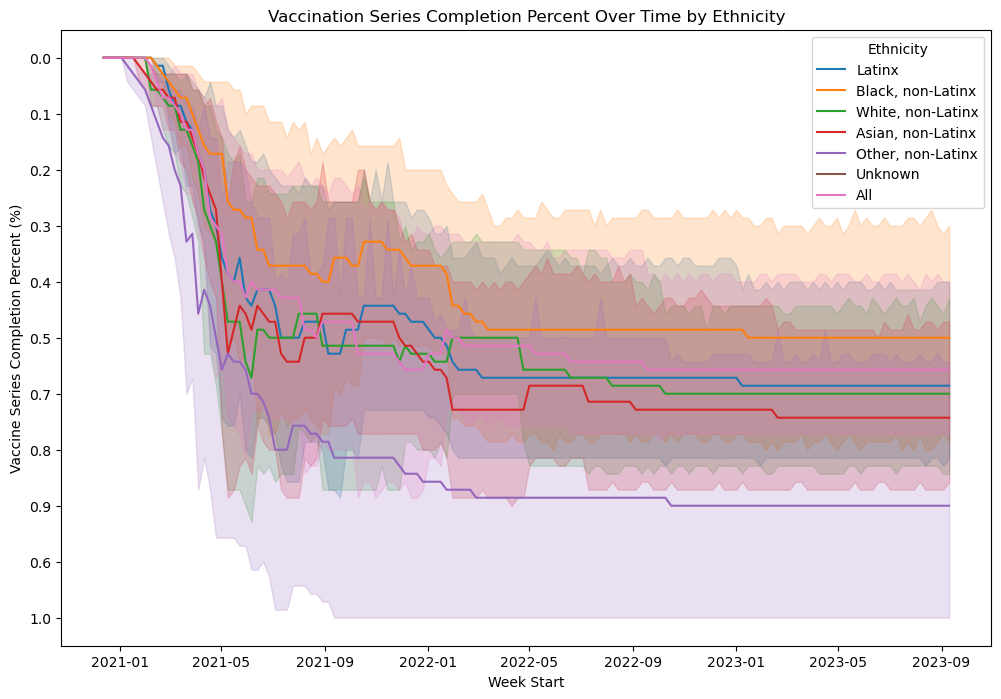

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_final_copy, x='week_start', y='Vaccine Series Completed Percent', hue='Race/Ethnicity')
plt.title('Vaccination Series Completion Percent Over Time by Ethnicity')
plt.xlabel('Week Start')
plt.ylabel('Vaccine Series Completion Percent (%)')
plt.legend(title='Ethnicity')
plt.show()



### Inference/Interpretation:
- This graph shows how vaccination was least completed over a period of time for the Black, non-latinx group and the most was by Other, non-Latinx followed by Asian, non-Latinx

### ***Preprocessing***

In [21]:

df_processed = pd.get_dummies(df_final_copy, columns=['Race/Ethnicity'], drop_first=True)
df_processed.shape, df_processed.head()

((7012, 30),
    mmwr_week  week week_start   week_end     season    pathogen  \
 0     202051    51 2020-12-13 2020-12-19  2020-2021  SARS-CoV-2   
 1     202051    51 2020-12-13 2020-12-19  2020-2021  SARS-CoV-2   
 2     202051    51 2020-12-13 2020-12-19  2020-2021  SARS-CoV-2   
 3     202051    51 2020-12-13 2020-12-19  2020-2021  SARS-CoV-2   
 4     202051    51 2020-12-13 2020-12-19  2020-2021  SARS-CoV-2   
 
    lab_tot_tested  lab_tot_positive lab_pct_positive  \
 0           11640              1551     0.1332474227   
 1           11640              1551     0.1332474227   
 2           11640              1551     0.1332474227   
 3           11640              1551     0.1332474227   
 4           11640              1551     0.1332474227   
 
    lab_tot_tested_cumulative  ...  Boosted Boosted Percent Bivalent  \
 0                     129149  ...        0             0.0        0   
 1                     129149  ...        0             0.0        0   
 2               

## This graph shows the average vaccination completion percentages across different demographic groups.

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

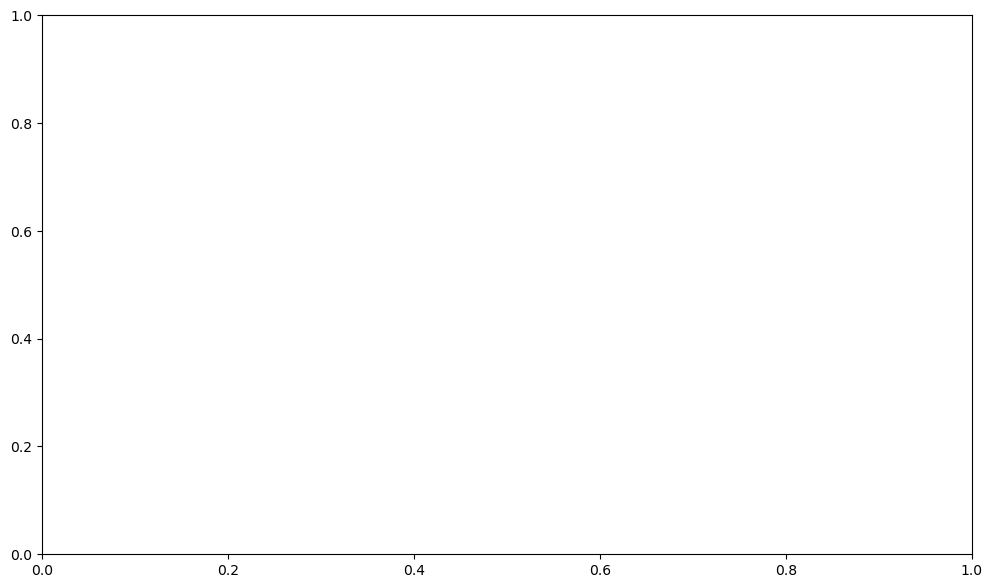

In [22]:
# Ensure 'Vaccine Series Completed Percent' is numeric
df_processed['Vaccine Series Completed Percent'] = pd.to_numeric(df_processed['Vaccine Series Completed Percent'], errors='coerce')

# Since we've coerced errors, there might be NaNs introduced if there were non-numeric values. Let's drop these.
df_processed.dropna(subset=['Vaccine Series Completed Percent'], inplace=True)

latest_week = df_processed['week_start'].max()
demographic_columns = [col for col in df_processed.columns if col.startswith('Race/Ethnicity_')]

# Retry summarizing the average vaccination completion percent across different demographics for the latest week
avg_vaccination_by_demographic = df_processed[df_processed['week_start'] == latest_week][demographic_columns + ['Vaccine Series Completed Percent']].groupby(demographic_columns).mean().reset_index()

# Melt the DataFrame to make it suitable for seaborn barplot again
avg_vaccination_melted = avg_vaccination_by_demographic.melt(id_vars=['Vaccine Series Completed Percent'], var_name='Demographic Group', value_name='Presence')

# Filter out rows where the demographic group is not present
avg_vaccination_melted_filtered = avg_vaccination_melted[avg_vaccination_melted['Presence'] == 1]

bar_colors = ['skyblue', 'orange', 'green', 'red', 'purple']


# Visualize again
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_vaccination_melted_filtered, x='Demographic Group', y='Vaccine Series Completed Percent', errorbar=None, palette=bar_colors, hue='Demographic Group', legend=False)
plt.title('Vaccination Completion Percent by Demographic Group for the Latest Week')
plt.xlabel('Demographic Group')
plt.ylabel('Average Vaccination Completion Percent')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Inference/Interpretation:
- This graph shows the absolute average vaccination completion percent with regards to their Ethnicity.
- This shows that the least vaccinated are the Black group and the most are the Asians but the surprising part is that it is not the whites as they are at a tie with the Latinx group.

## `Machine Learning analysis:`
1. **Feature Selection**: Choosing relevant features for the ML model, including demographic indicators, COVID-19 case numbers, and temporal features.
2. **Model Development**: Selecting and training an ML model to analyze the impact of COVID-19 case increases on vaccination rates among different demographics.
3. **Model Evaluation**: Comparing the model's predictions to a baseline, assessing its performance, and interpreting the results to derive actionable insights.

### Feature Selection
I will select features that are likely to influence vaccination rates, including:
- **Temporal Features**: `week_start` (converted to a numerical format), to capture time trends.
- **COVID-19 Case Numbers**: `lab_tot_positive` or `lab_pct_positive`, to measure the impact of COVID-19 spread.
- **Demographic Indicators**: One-hot encoded `Race/Ethnicity_*` columns, to assess disparities among different demographics.

### Model Development
For simplicity and interpretability, I will start with a Linear Regression model. This model will help us understand the relationship between our selected features and vaccination rates.

### Preparing the Data
- Convert `week_start` to a numerical format by calculating the number of days since the first date in the dataset.
- Select the outcome variable: `Vaccine Series Completed Percent`.
- Removing Rows with Missing `y` Values: This is the simplest approach, where we only keep rows that have a non-missing outcome variable.
- Imputation: Replace missing values with a statistic, such as the mean or median of the column. For the outcome variable, this approach might not always be suitable, as it could introduce bias.
- Split the data into training and testing sets to evaluate the model's performance.

Given the nature of our analysis, removing rows with missing `y` values might be the most straightforward and least biased approach.

The Mean Squared Error (MSE) for the test set, after removing rows with missing outcome variable values and retraining the Linear Regression model, is approximately 0.090. This metric quantifies the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates a better fit of the model to the data.

### Interpretation
- **Interpretation**: The obtained MSE can be used to evaluate the performance of the model. However, understanding its implications requires context, such as the variance of the `Vaccine Series Completed Percent` across the dataset and comparisons to baseline models or other ML models.
- **Model Coefficients**: Analyzing the coefficients of the Linear Regression model could provide insights into how different features, including demographic indicators and COVID-19 case numbers, impact vaccination rates.
- **Improvements**: I am going to consider exploring other models to improve model performance.

### Making predictions on what should be the target demographic for advertisments

In [ ]:
# Convert 'week_start' to datetime format and calculate the number of days since the first record
df_processed['week_start'] = pd.to_datetime(df_processed['week_start'])
df_processed['days_since_start'] = (df_processed['week_start'] - df_processed['week_start'].min()).dt.days

# Feature selection
X_features = ['days_since_start', 'lab_tot_positive'] + demographic_columns
y_feature = 'Vaccine Series Completed Percent'

df_cleaned = df_processed.dropna(subset=[y_feature])

# Prepare the data again with the cleaned DataFrame
X_cleaned = df_cleaned[X_features]
y_cleaned = df_cleaned[y_feature]

# Split the data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


#### Creating a baseline and calculating it's mse to compare it to the trained model:
In the context of our analysis, a baseline model serves as a simple reference point to compare the performance of our more complex machine learning models. It helps us understand the added value of our model in predicting vaccination completion percentages. For regression task at hand:

1. **Mean Model**: Predicts the mean of the target variable for all instances, regardless of the input features. This model's performance can be measured using metrics like Mean Squared Error (MSE), providing a basic benchmark for improvement.

### Establishing a Baseline
For our analysis, the **mean model** serves as a straightforward and intuitive baseline. We'll calculate the mean of the `Vaccine Series Completed Percent` from the training data and use this as a constant prediction for all instances in the test set. We can then calculate the MSE of this baseline to compare it against the MSE from our linear regression model.

### Calculating the Baseline Performance
The baseline MSE offers a point of comparison for evaluating the linear regression model. If the MSE of the linear regression model is significantly lower than the baseline MSE, this indicates that our model provides a better fit to the data than the simple average, thereby offering more precise predictions about vaccination rates.


In [ ]:
# Calculate the mean of the target variable from the training data
mean_vaccination_rate = y_train_cleaned.mean()

# Create an array of the same mean value to serve as our baseline predictions
baseline_predictions = np.full(shape=y_test_cleaned.shape, fill_value=mean_vaccination_rate)

# Calculate the Mean Squared Error (MSE) for the baseline model
baseline_mse = mean_squared_error(y_test_cleaned, baseline_predictions)

# Display the baseline MSE
baseline_mse

0.12412773424902467

#### Training the model, making predictions and printing out mse to compare to baseline:

In [ ]:

# Re-initialize and re-train the Linear Regression model on the cleaned data
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict on the testing set
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Calculate the Mean Squared Error (MSE) for the test set with cleaned data
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)

# Display the MSE
mse_cleaned

0.09015084515057206

In [ ]:
# Retrieve the model coefficients
coefficients = model_cleaned.coef_

# Create a DataFrame to display feature names alongside their coefficients
coefficients_df = pd.DataFrame(data={'Feature': X_features, 'Coefficient': coefficients})

# Display the DataFrame sorted by the absolute value of coefficients for better interpretation
coefficients_df.sort_values(by='Coefficient', key=abs, ascending=False)


,Feature,Coefficient
5,"Race/Ethnicity_Other, non-Latinx",0.190503
3,"Race/Ethnicity_Black, non-Latinx",-0.121842
2,"Race/Ethnicity_Asian, non-Latinx",0.067921
4,Race/Ethnicity_Latinx,0.027071
0,days_since_start,0.000542
7,"Race/Ethnicity_White, non-Latinx",0.000517
1,lab_tot_positive,0.000026
6,Race/Ethnicity_Unknown,0.000000


To gain insights into how the increase in COVID-19 cases and demographic factors influence vaccination rates, we'll examine the coefficients of the trained Linear Regression model. These coefficients quantify the relationship between each feature and the target variable, `Vaccine Series Completed Percent`, giving us a direct interpretation of their influence.

### Analyzing Model Coefficients

1. **Coefficient Interpretation**: For continuous features like `days_since_start` and `lab_tot_positive`, the coefficient value indicates the expected change in the vaccination completion percentage for a one-unit increase in the feature, holding all other features constant. For binary features resulting from one-hot encoding (e.g., demographic groups), the coefficient represents the difference in the vaccination completion percentage compared to the baseline category (which was dropped during one-hot encoding), again holding other variables constant.

2. **Significance**: The magnitude and sign of each coefficient provide insights into the feature's impact. Positive coefficients indicate a direct relationship with vaccination rates, while negative coefficients suggest an inverse relationship.

Let's retrieve and interpret the coefficients of our Linear Regression model.

The coefficients of our Linear Regression model provide the following insights into the relationship between the features and the `Vaccine Series Completed Percent`:

1. **Demographic Indicators**:
   - The `Race/Ethnicity_Other, non-Latinx` group shows a positive coefficient of 0.190, suggesting a higher vaccination completion percentage compared to the baseline demographic group, holding all other variables constant.
   - Conversely, the `Race/Ethnicity_Black, non-Latinx` group has a negative coefficient (-0.121), indicating a lower vaccination completion percentage compared to the baseline, all else being equal.
   - Other demographic groups (`Asian, non-Latinx`, `Latinx`, and `White, non-Latinx`) also show positive coefficients but with smaller magnitudes, suggesting varying degrees of influence on vaccination rates.

2. **Temporal Feature (`days_since_start`)**:
   - The positive coefficient (0.000542) implies that as time progresses, there's a slight increase in the vaccination completion percentage, which could reflect the overall trend of vaccination rollout over time.

3. **COVID-19 Case Numbers (`lab_tot_positive`)**:
   - The very small positive coefficient (0.000026) indicates that higher numbers of COVID-19 positive cases are slightly associated with an increase in vaccination completion rates, though the effect size is minimal.

4. **Significance and Impact**:
   - The largest impacts on vaccination rates, according to this model, come from demographic factors, particularly for the `Other, non-Latinx` and `Black, non-Latinx` groups, highlighting disparities in vaccination rates among different demographics.
   - The effect of time and COVID-19 case numbers on vaccination rates is present but relatively minor compared to the impact of demographic factors.

### Next Steps:
Given these findings, targeted initiatives to increase vaccination rates could focus on demographic groups identified as having lower vaccination completion percentages.
- Alternative modeling approaches, such as logistic regression for binary outcomes to potentially uncover non-linear relationships or interactions between features.

### Key Interpretations and Implications:

1. **Demographic Disparities**:
   - **Other, non-Latinx**: The most significant positive influence on vaccination rates suggests that this group, relative to the baseline demographic, has higher vaccination completion rates. This could indicate successful outreach or higher acceptance rates within this group. Public health strategies targeting other groups might learn from approaches used with this demographic.
   - **Black, non-Latinx**: The negative coefficient points to lower vaccination rates in this group compared to the baseline, underscoring the need for targeted public health messaging and vaccination initiatives that address the specific concerns and barriers faced by Black, non-Latinx communities.
   - Other demographic groups also show varying degrees of influence, highlighting the nuanced landscape of vaccination acceptance and access across different demographics. Tailoring strategies to each group's unique context and barriers could improve overall vaccination rates.

2. **Temporal Trends**:
   - The positive coefficient associated with `days_since_start` suggests a gradual increase in vaccination rates over time. This trend likely reflects the expanding availability of vaccines and the cumulative effect of ongoing public health campaigns. Continuous efforts are necessary to maintain and accelerate this positive trend.

3. **COVID-19 Case Numbers**:
   - The small positive coefficient for `lab_tot_positive` suggests that increases in COVID-19 cases have a marginal association with higher vaccination rates. This could indicate a reactive increase in vaccination efforts following surges in cases, but the small magnitude of this effect suggests that case surges alone are not a strong driver of vaccination uptake. Proactive, sustained vaccination campaigns may be more effective than relying on reactive increases following case surges.

### Strategic Implications for Public Health:
- **Targeted Initiatives**: The disparities among demographic groups highlight the need for targeted vaccination initiatives. Understanding and addressing the barriers specific to groups with lower vaccination rates are crucial.
- **Enhanced Outreach and Education**: For demographics showing resistance or lower rates of vaccination, such as the Black, non-Latinx community, enhanced outreach programs, community engagement, and education efforts could help address concerns and misinformation.
- **Monitoring and Adaptation**: The ongoing analysis of vaccination trends and their correlation with COVID-19 case numbers can inform adaptive strategies that preemptively address potential surges in cases through increased vaccination efforts.

### Conclusion and Next Steps:
This analysis underscores the importance of demographic considerations and the dynamic nature of vaccination campaigns in response to COVID-19. For public health officials and policymakers, these insights can inform more effective, equitable vaccination initiatives that are responsive to community needs and changing circumstances.

Further investigation could include:
- **Exploring Interaction Effects**: Analyzing how demographic factors interact with temporal trends might reveal more complex dynamics influencing vaccination rates.
- **Alternative Modeling Approaches**: Using models that capture non-linear relationships or interactions could provide additional insights into factors influencing vaccination rates.

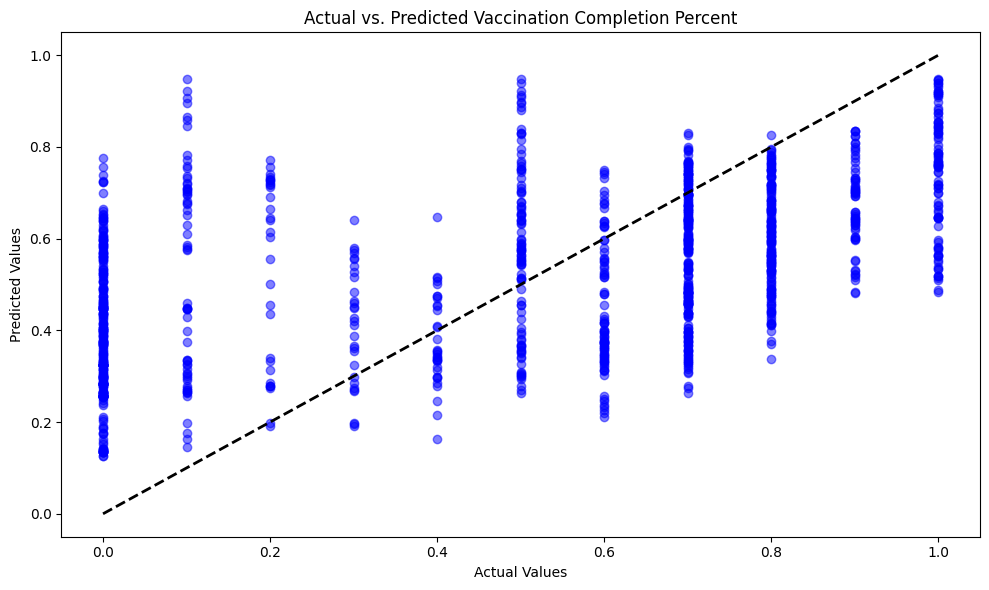

In [ ]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.5, color='blue')
plt.title('Actual vs. Predicted Vaccination Completion Percent')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'k--', lw=2)
plt.tight_layout()

# Show the plot
plt.show()


### Visualization description:
To visualize the regression analysis we performed, especially for a linear regression model, I have ploted the actual versus predicted values to assess how well the model fits the data. 

This plot includes a dashed line representing perfect predictions (where actual values equal predicted values) to help visually assess the model's accuracy. Points close to this line indicate accurate predictions, while points farther away represent larger discrepancies between the model's predictions and the actual data.

### Reflection:
- The hardest part I encountered was data cleaning and making the input features for the machine learning model as I had some missing values for some reason and they were hard to figure out how to take care of them.
- My inital insights are that we need to focus on the minority of the african-americans for the vaccination campaigns.
- Going forward I do not thing that there are any major problems that me and my team is facing.
- There are concrete results that are from my model and they are displayed in the notebook.
- I think we are on track with the project.
- Yes I think it is worth proceeding with the project as we have enough data to support our hypothesis and make predictions based on the data that we have which will indicate the ethnicity of the target advertisments.

### Next Steps:
Given these findings, targeted initiatives to increase vaccination rates could focus on demographic groups identified as having lower vaccination completion percentages.
- Alternative modeling approaches, such as logistic regression for binary outcomes to potentially uncover non-linear relationships or interactions between features.

### Any changes:
- There are no changes to the scope of the project and we will proceed as intened for the project.